# Classifiació amb Regressió Logística

Paleta de colors utilitzada: https://coolors.co/palette/ff595e-ffca3a-8ac926-1982c4-6a4c93

In [22]:
# dependencies
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from numpy import mean, std

from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, GridSearchCV

In [2]:
# dades
dataset = pd.read_csv('all_scenarios.csv')
y = dataset["Escenari"]
dataset.drop(["Escenari"], axis=1, inplace=True)
X = dataset

# separem per a entrenar i comprovar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [3]:
# funció d'avaluació bàsica
def evaluate_cross_validation_logreg(X_train, y_train, k_folds, chosen_solver='lbfgs', score_name='accuracy'):
    
    model = LogisticRegression(multi_class='multinomial', solver=chosen_solver)
    cv = RepeatedStratifiedKFold(n_splits=k_folds, n_repeats=5)
    n_scores = cross_val_score(model, X_train, y_train, scoring=score_name, cv=cv, n_jobs=-1)
    
    print(chosen_solver, "\n------")
    print("Mitja de la precisió:", round(mean(n_scores)*100, 6), "%")
    print("Desviació estàndard de la precisió:", round(std(n_scores)*100, 6), "%")
    return n_scores

#### Simple model with raw data
***

Volem veure amb quins percentatges de precisió partim. Serà la base des de la qual voldrem millorar els algorismes

In [4]:
srt = time.time()
n_scores_lbfgs = evaluate_cross_validation_logreg(X_train, y_train, 10, 'lbfgs')
end = time.time()
print("Temps d'execució", round(end - srt, 6), "segons")

lbfgs 
------
Mitja de la precisió: 10.662123 %
Desviació estàndard de la precisió: 1.253221 %
Temps d'execució 13.906023 segons


In [5]:
srt = time.time()
n_scores_sag = evaluate_cross_validation_logreg(X_train, y_train, 10, 'sag')
end = time.time()
print("Temps d'execució", round(end - srt, 6), "segons")

sag 
------
Mitja de la precisió: 9.43033 %
Desviació estàndard de la precisió: 0.88031 %
Temps d'execució 13.193299 segons


In [6]:
srt = time.time()
n_scores_saga = evaluate_cross_validation_logreg(X_train, y_train, 10, 'saga')
end = time.time()
print("Temps d'execució", round(end - srt, 6), "segons")

saga 
------
Mitja de la precisió: 8.344173 %
Desviació estàndard de la precisió: 0.802533 %
Temps d'execució 15.427992 segons


In [7]:
srt = time.time()
n_scores_newton = evaluate_cross_validation_logreg(X_train, y_train, 10, 'newton-cg')
end = time.time()
print("Temps d'execució", round((end - srt)/ 60, 6), "minuts")

newton-cg 
------
Mitja de la precisió: 19.455244 %
Desviació estàndard de la precisió: 1.16829 %
Temps d'execució 23.429466 minuts


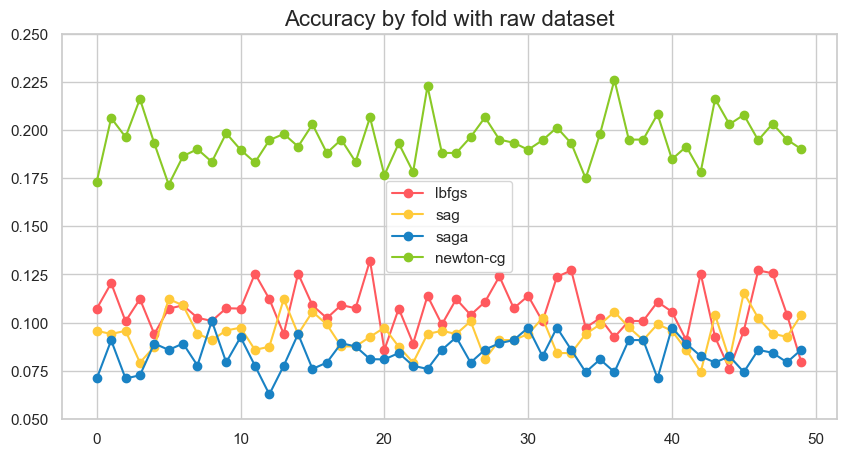

In [24]:
plt.figure(figsize=(10,5)) 

plt.plot(n_scores_lbfgs, "o-", label = "lbfgs", color = "#FF595E")
plt.plot(n_scores_sag, "o-", label = "sag", color = "#FFCA3A")
plt.plot(n_scores_saga, "o-", label = "saga", color = "#1982c4")
plt.plot(n_scores_newton, "o-", label = "newton-cg", color = "#8AC926")

plt.title("Accuracy by fold with raw dataset", fontsize=16)
plt.ylim([0.05, 0.250])

plt.legend()
plt.show()

#### Simple model with standardized data
***

El següent pas serà aplicar tots els processos d'estandarització per a tenir els atributs en la mateixa magnitud

In [9]:
dataset = pd.read_csv('all_scenarios.csv')
for attr in dataset.columns:
    preprocessing.scale(dataset[[attr]])
    
y = dataset["Escenari"]
dataset.drop(["Escenari"], axis=1, inplace=True)
X = dataset

# separem per a entrenar i comprovar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [10]:
srt = time.time()
standard_lbfgs = evaluate_cross_validation_logreg(X_train, y_train, 10, 'lbfgs')
end = time.time()
print("Temps d'execució", round(end - srt, 6), "segons")

lbfgs 
------
Mitja de la precisió: 10.883305 %
Desviació estàndard de la precisió: 0.992812 %
Temps d'execució 7.850484 segons


In [11]:
srt = time.time()
standard_sag = evaluate_cross_validation_logreg(X_train, y_train, 10, 'sag')
end = time.time()
print("Temps d'execució", round(end - srt, 6), "segons")

sag 
------
Mitja de la precisió: 11.682383 %
Desviació estàndard de la precisió: 0.870364 %
Temps d'execució 6.871755 segons


In [12]:
srt = time.time()
standard_saga = evaluate_cross_validation_logreg(X_train, y_train, 10, 'saga')
end = time.time()
print("Temps d'execució", round(end - srt, 6), "segons")

saga 
------
Mitja de la precisió: 11.566604 %
Desviació estàndard de la precisió: 0.937996 %
Temps d'execució 7.721031 segons


In [13]:
srt = time.time()
standard_newton = evaluate_cross_validation_logreg(X_train, y_train, 10, 'newton-cg')
end = time.time()
print("Temps d'execució", round((end - srt)/ 60, 6), "minuts")

newton-cg 
------
Mitja de la precisió: 19.580591 %
Desviació estàndard de la precisió: 1.180444 %
Temps d'execució 21.419048 minuts


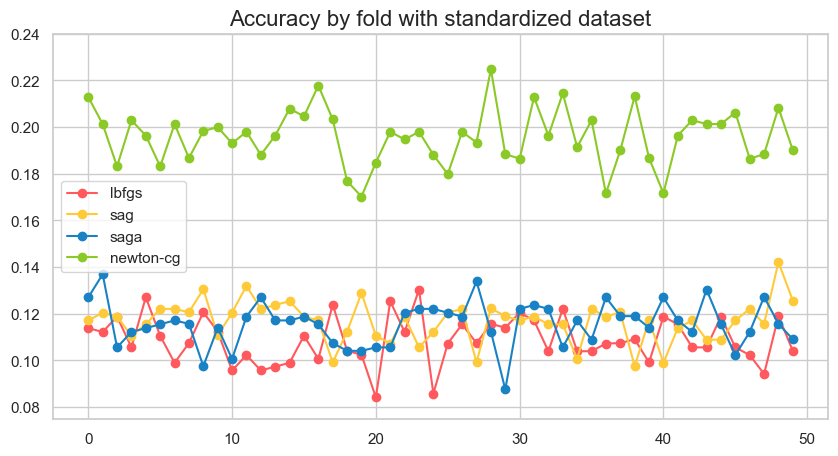

In [25]:
plt.figure(figsize=(10,5)) 

plt.plot(standard_lbfgs, "o-", label = "lbfgs", color = "#FF595E")
plt.plot(standard_sag, "o-", label = "sag", color = "#FFCA3A")
plt.plot(standard_saga, "o-", label = "saga", color = "#1982c4")
plt.plot(standard_newton, "o-", label = "newton-cg", color = "#8AC926")

plt.title("Accuracy by fold with standardized dataset", fontsize=16)
plt.ylim([0.075, 0.240])

plt.legend()
plt.show()

#### Comparison of results by accuracy
***

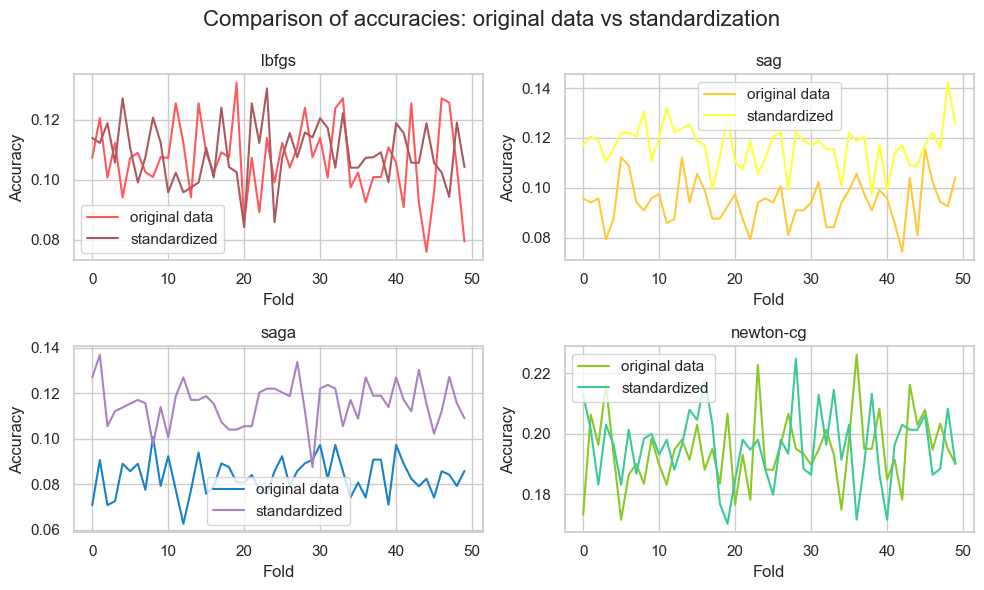

In [26]:
# comparació de solucionadors en les dades originals vs les estandaritzades
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].plot(n_scores_lbfgs, label = "original data", color = "#FF595E")
axs[0, 0].plot(standard_lbfgs, label = "standardized", color = "#AA595E")
axs[0, 0].set_title('lbfgs')
axs[0, 0].legend()

axs[0, 1].plot(n_scores_sag, label = "original data", color = "#FFCA3A")
axs[0, 1].plot(standard_sag, label = "standardized", color = "#ffff3a")
axs[0, 1].set_title('sag')
axs[0, 1].legend()

axs[1, 0].plot(n_scores_saga, label = "original data", color = "#1982c4")
axs[1, 0].plot(standard_saga, label = "standardized", color = "#A982c4")
axs[1, 0].set_title('saga')
axs[1, 0].legend()

axs[1, 1].plot(n_scores_newton, label = "original data", color = "#8AC926")
axs[1, 1].plot(standard_newton, label = "standardized", color = "#3cc996")
axs[1, 1].set_title('newton-cg')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='Fold', ylabel='Accuracy')
# for ax in axs.flat:
#     ax.label_outer()

fig.suptitle("Comparison of accuracies: original data vs standardization", fontsize=16)
fig.tight_layout()
plt.show()

Les proves realitzades mostren que estandaritzar les dades, per a aquest dataset, no sempre ajuda a millorar la precisió del model. Al fixar-nos en els percentatges de precisió, veiem que aquest tipus de preprocessament és indiferent per al solucionador que utilitza l'algorisme de NewtonCG, qui obté els millors resultats en els dos casos, amb un 10% de diferència, fet que cal recalcar.

In [27]:
# coeficients de variació de les prediccions segons el solucionador per a les dades originals
cvs = [std(n_scores_lbfgs) / mean(n_scores_lbfgs), std(n_scores_sag) / mean(n_scores_sag),
        std(n_scores_saga) / mean(n_scores_saga), std(n_scores_newton) / mean(n_scores_newton)]

for cv, solver in zip(cvs, ["lbfgs", "sag", "saga", "newton-cg"]):
    print("Coef. Variació per a " + solver + ": "+str(cv))

Coef. Variació per a lbfgs: 0.11753949524142476
Coef. Variació per a sag: 0.09334884116021597
Coef. Variació per a saga: 0.09617883962745064
Coef. Variació per a newton-cg: 0.06005011373904419


In [28]:
# coeficients de variació de les prediccions segons el solucionador per a les dades estandarditzades
cvs = [std(standard_lbfgs) / mean(standard_lbfgs), std(standard_sag) / mean(standard_sag),
        std(standard_saga) / mean(standard_saga), std(standard_newton) / mean(standard_newton)]

for cv, solver in zip(cvs, ["lbfgs", "sag", "saga", "newton-cg"]):
    print("Coef. Variació per a " + solver + ": "+str(cv))

Coef. Variació per a lbfgs: 0.09122338459610134
Coef. Variació per a sag: 0.0745022976599737
Coef. Variació per a saga: 0.08109520873943007
Coef. Variació per a newton-cg: 0.06028645473164859


Atès que s'ha utilitzat una tècnica de validació creuada per probar el model en subconjunts de les dades, tal que es pugui trobar quins solucionadors són més robusts, cal comprovar si les precisions obtingudes són homogenies o no. És a dir, cal assegurar-se que la mitja amb la qual es decideix quin model és millor és representativa del conjunt de resultats retornat pel mètode de validació creudada del model.

El coeficient de validació de Pearson és un paràmetre estadístic que dóna informació sobre la dispersió relativa de les dades obtingudes. Donada la naturalesa de les dades i la seva magnitud, estimem que si algun resultat és major a 0,25 llavors cal descartar el model. 

Observem que el màxim coeficient obtingut és 0.1175. Per tant, es poden considerar vàlids tots els resultats. A més, veiem que el solucionador de NewtonCG aconsegueix el coeficint més petit, per la qual cosa podem acceptar-lo com al millor solucionador per a un model de regressió Logística sobre les nostres dades.

#### Other metrics
***
El següent pas serà veure si el model utilitzat fins ara, amb el solucionador de NewtonCG, és consistent si es mesura amb altres mètriques. Si trobem que el recall és molt més petit, llavors no el podrem considerar com una solució destacable.

In [19]:
srt = time.time()

lr_newton_model = LogisticRegression(multi_class='multinomial', solver="newton-cg", max_iter = 5000).fit(X_train, y_train)
y_pred = lr_newton_model.predict(X_test)

accuracy_lr_model = accuracy_score(y_test, y_pred) 
recall_lr_model = recall_score(y_test, y_pred, average="macro")
f1_lr_model = f1_score(y_test, y_pred, average="macro")

end = time.time() - srt
print("Precisió obtinguda:", round(accuracy_lr_model*100, 6), 
      "\nPuntuació de recall:", round(recall_lr_model*100, 6), "\nPuntuació F1:", round(f1_lr_model, 6))
print("Temps d'execució", round(end/ 60, 6), "minuts")

Precisió obtinguda: 36.200539 
Puntuació de recall: 36.581294 
Puntuació F1: 0.326774
Temps d'execució 44.220224 minuts


C:\Users\fdezm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


En aquest cas s'ha utilitzat totes les dades per a comprovar com es comporta el model amb el solucionador seleccionat. Considerem que la millora de precisió és natural, ja que ara ha treballat amb totes les mostres i no subconjunts d'aquestes. 

Observem que la puntuació de recall, que mesura el nombre de prediccions correctes per escenari de totes les mostres que s'han etiquetat com a dit escenari, és similar a la precisió obtinguda. Això és quelcom alarmant perquè denota que hi ha una desbalanceig important en el nombre de mostres per a cada escenari. 

És obvi que els escenaris tindràn diferent nombre de nodes, cosa que afecta directament al nombre de mostres per escenari. Caldrà considerar tècniques de remostreig per balancejar les dades o considerar només els X primers nodes de cada xarxa. En qualsevol cas, s'haurà de tenir en compte també si es pot mitigar aquest efecte utilitzant models d'aprenentatge profund.